## Importing the required libraries

In [10]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 
from matplotlib.pyplot import specgram
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
#from keras.layers import LSTM
#from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
import pandas as pd
import glob
import os
from keras_tqdm import TQDMNotebookCallback
import pickle

###  Predictions on Nirvana "SLTS"  track intro

In [73]:
# DATA : 1s samples of 19s intro
# https://is.gd/s1jgYy

os.chdir('/home/stjepan/Downloads/labels2') #change to your wavs directory   
df = pd.DataFrame(columns=['feature'])
bookmark=0


for file in list(sorted(glob.glob('*.wav'))):
        # change sampling rate until you match model input shape
        X, sample_rate = librosa.load(file, res_type='kaiser_fast',duration=1,sr=104500,offset=0)
        sample_rate = np.array(sample_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X, 
                                            sr=sample_rate, 
                                            n_mfcc=26),
                                            axis=0)
        
        feature = mfccs
        df.loc[bookmark] = [feature]
        bookmark=bookmark+1        

In [74]:
df3 = pd.DataFrame(df['feature'].values.tolist())
df3[:3]

,0,1,2,3,4,5,6,7,8,9,...,195,196,197,198,199,200,201,202,203,204
0,-26.906614,-26.906614,-26.906614,-26.906614,-26.906614,-26.906614,-26.906614,-26.906614,-26.906614,-26.906614,...,-7.938970,-8.787444,-9.235553,-8.329660,-8.629535,-9.449375,-12.202149,-12.736406,-9.750092,-10.136727
1,-16.193807,-12.291043,-11.975161,-13.007956,-11.865799,-10.960002,-11.319426,-11.108019,-12.056135,-12.437627,...,-7.786324,-6.546212,-7.348836,-7.198330,-7.282862,-4.855047,-4.797885,-6.756270,-2.249077,-0.829777
2,-1.739046,-3.492151,-4.857530,-3.639941,-4.798850,-5.039188,-4.314454,-6.954835,-7.256600,-5.629380,...,-4.326739,-5.589789,-3.676402,-3.419546,-4.368611,-3.894743,-3.584872,-5.527562,-3.603959,-0.495594


In [75]:
song_test = np.array(df3)
song_test = np.expand_dims(song_test, axis=2)

In [76]:
from keras.models import load_model

model_R = load_model('/home/stjepan/Documents/_Krish_Suchitra_Tristan_PORTFOLIO/DL_audio/saved_models/guitar_dist_gain_0-60_reverberance_50-100_CPR_on-off_150ep_lr_0.0001_dropout_0.3_TRIADS.h5')

preds = model_R.predict(song_test, 
                         batch_size=32, 
                         verbose=1)

preds=list(preds[:,0])
#actual=list(Y_val[:,0])

preds


19/19 [==============================] - 0s 14ms/step


[0.0,
 0.0,
 6.954333,
 8.346338,
 12.128059,
 15.809594,
 12.125745,
 8.818291,
 56.867317,
 55.055054,
 59.501183,
 57.59344,
 47.345043,
 59.88975,
 59.922215,
 57.289272,
 52.825348,
 57.584057,
 58.679554]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]

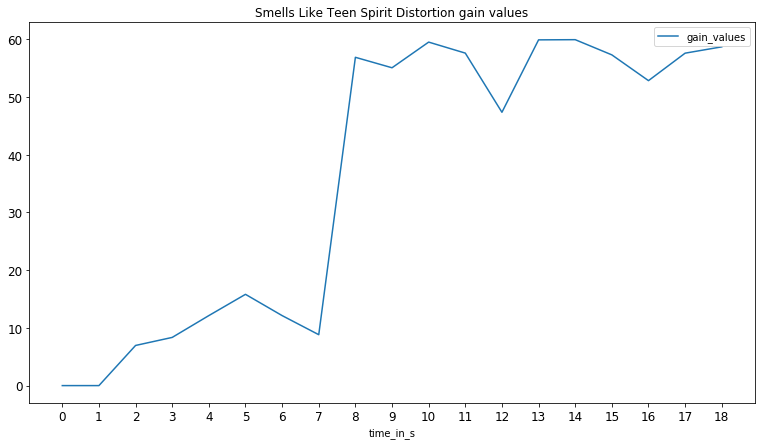

In [88]:
import numpy as n
time = np.arange(0,19,1)
time_l = list(time)


plot_list = pd.DataFrame(
    {'gain_values': preds,
     'time_in_s': time    })

plot_list.plot(x="time_in_s",y="gain_values", 
               figsize = (13,7), 
               fontsize= 12, 
               title="Smells Like Teen Spirit Distortion gain values", 
               kind = "line",
               xticks = time_l)



### Ploting actual vs predicted values for our model

2.072432465851307


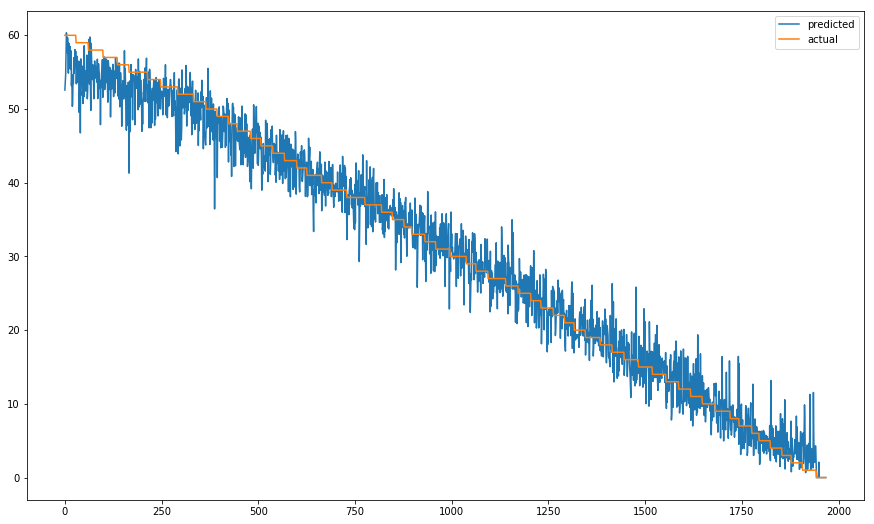

In [35]:
results['diff'] = abs(results['predicted'] - results['actual'])
print(results['diff'].mean()) 
results.head(15)

results.sort_values(by='actual', ascending=False, inplace = True)

results_p=results[["predicted", "actual"]]

results_p.reset_index(inplace=True, drop = "index")
results_p.plot()

In [36]:
results['diff'].describe()

count    1968.000000
mean        2.072432
std         1.830696
min         0.000000
25%         0.724854
50%         1.596896
75%         2.957747
max        13.698982
Name: diff, dtype: float64